Mean Absolute Error: 0.2786
R-squared Score: 0.9965


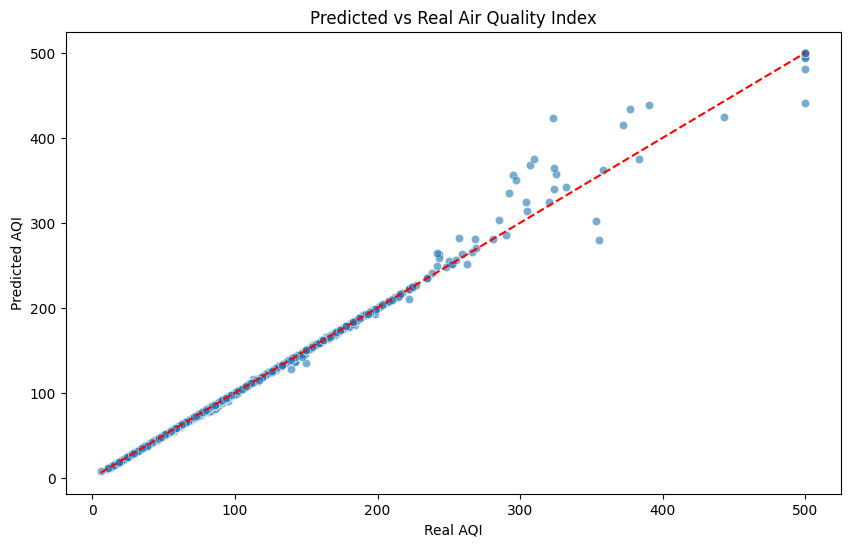

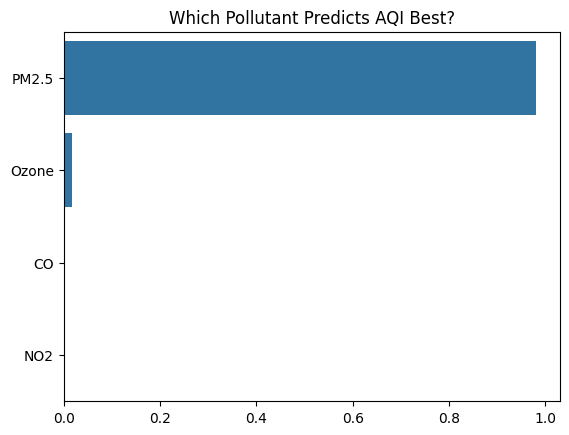

In [57]:
## 1. DATA CLEANING
import pandas as pd
import numpy as np
dataframe = pd.read_csv('global_air_pollution_data.csv')
dataframe = dataframe.dropna()
#dataframe.head()

features = dataframe[['co_aqi_value\t', 'ozone_aqi_value',
                      'no2_aqi_value', 'pm2.5_aqi_value']]
target = dataframe['aqi_value']
#features.shape


## 2. PREDICTION MODEL
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features_train, target_train) # Trains 100 decision trees
predictions = model.predict(features_test)


## 3. STATISTICAL TESTS
from sklearn.metrics import mean_absolute_error, r2_score
MAE = mean_absolute_error(target_test, predictions)
R2 = r2_score(target_test, predictions)
print(f"Mean Absolute Error: {MAE:.4}")
print(f"R-squared Score: {R2:.4}")


## 4. PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=target_test, y=predictions, alpha=0.6)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'r--')
plt.xlabel('Real AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Real Air Quality Index')
plt.show()

labels = {'pm2.5_aqi_value':'PM2.5', 'ozone_aqi_value':'Ozone', 'co_aqi_value\t':'CO', 'no2_aqi_value':'NO2'}
importances = pd.Series(model.feature_importances_, index=features.columns.map(labels)).sort_values(ascending=False)
sns.barplot(x=importances.values, y=importances.index)
plt.title('Which Pollutant Predicts AQI Best?')
plt.ylabel('')
plt.show()